In [569]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import plotly.graph_objects as go

In [570]:
consumerpricedata = pd.read_csv(r"D:\WORK\datascience\practice\Consumer-Price-Index-Analysis\All-India-Consumer-Price-Index.csv")

In [571]:
consumerpricedata.head(10)

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
5,Rural+Urban,2013,February,110.4,110.2,112.8,104.9,105.5,103.6,103.2,...,100.4,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3
6,Rural,2013,March,110.2,108.8,109.9,105.6,106.2,105.7,101.4,...,NaN,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0
7,Urban,2013,March,113.9,111.4,113.2,104.3,102.7,104.9,103.8,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0
8,Rural+Urban,2013,March,111.4,109.7,111.2,105.1,104.9,105.3,102.2,...,100.4,106.1,105.6,104.9,105.1,103.7,104.0,104.3,104.7,105.5
9,Rural,2013,April,110.2,109.5,106.9,106.3,105.7,108.3,103.4,...,NaN,106.5,106.1,105.1,104.4,104.5,104.8,102.7,104.6,106.4


In [572]:
consumerpricedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               365 non-null    object 
 1   Year                                 365 non-null    int64  
 2   Month                                365 non-null    object 
 3   Cereals and products                 362 non-null    float64
 4   Meat and fish                        359 non-null    float64
 5   Egg                                  362 non-null    float64
 6   Milk and products                    362 non-null    float64
 7   Oils and fats                        362 non-null    float64
 8   Fruits                               362 non-null    float64
 9   Vegetables                           362 non-null    float64
 10  Pulses and products                  362 non-null    float64
 11  Sugar and Confectionery         

In [573]:
consumerpricedata.isnull()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [574]:
#consumerpricedata['Year'] = pd.to_datetime(consumerpricedata['Year']).astype(str)

In [575]:
#consumerpricedata.info()

In [576]:
consumerpricedata['Month'] = consumerpricedata['Month'].str.strip()

In [577]:
consumerpricedata.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [578]:
consumerpricedata['Month'] = consumerpricedata['Month'].replace('Marcrh','March')

In [579]:
consumerpricedata['Date'] = pd.to_datetime((consumerpricedata['Year']).astype(str) + '-' + consumerpricedata['Month'].str.strip(), format='%Y-%B')


In [580]:
consumerpricedata['Date'].head()

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-02-01
4   2013-02-01
Name: Date, dtype: datetime64[ns]

In [581]:
consumerpricedata.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Date
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1,2013-01-01
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0,2013-01-01
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6,2013-01-01
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8,2013-02-01
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7,2013-02-01


In [582]:
Rural_Urban_cpi = consumerpricedata[consumerpricedata['Sector'] == 'Rural+Urban'].sort_values('Date')

In [583]:
Rural_Urban_cpi.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Date
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6,2013-01-01
5,Rural+Urban,2013,February,110.4,110.2,112.8,104.9,105.5,103.6,103.2,...,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3,2013-02-01
8,Rural+Urban,2013,March,111.4,109.7,111.2,105.1,104.9,105.3,102.2,...,106.1,105.6,104.9,105.1,103.7,104.0,104.3,104.7,105.5,2013-03-01
11,Rural+Urban,2013,April,111.6,110.9,106.6,105.7,104.4,108.9,105.5,...,106.5,106.3,105.3,104.7,104.2,105.0,102.9,104.8,106.1,2013-04-01
14,Rural+Urban,2013,May,112.3,111.3,104.7,106.8,103.9,109.3,112.9,...,107.4,106.9,105.9,104.0,104.8,105.6,102.3,104.8,106.9,2013-05-01


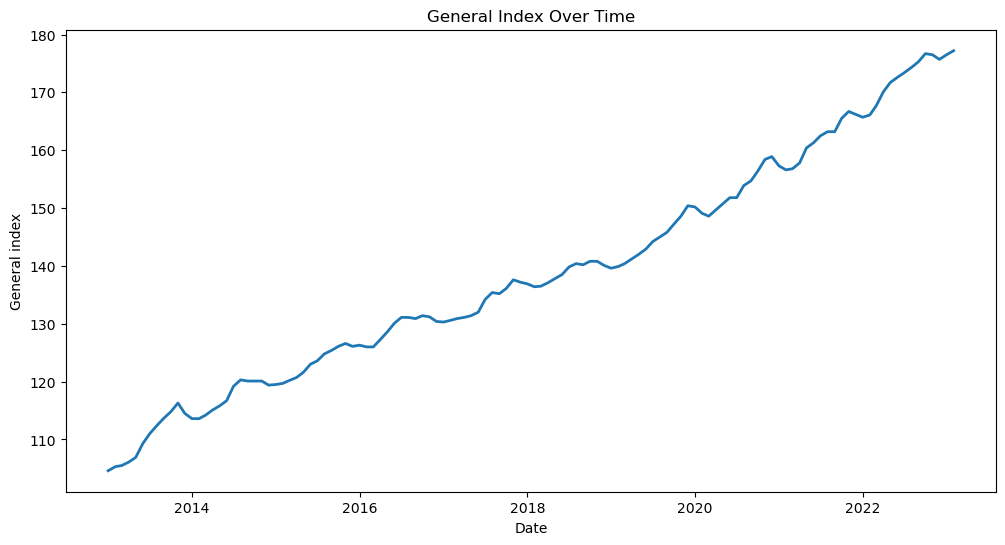

In [584]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Rural_Urban_cpi,x='Date',y='General index',linewidth='2',markers=True)
plt.xlabel("Date")             
plt.ylabel("General index")     
plt.title("General Index Over Time")  

plt.show() 


In [585]:
Rural_Urban_cpi.set_index('Date', inplace=True)
monthlycpi = Rural_Urban_cpi['General index'].resample('M').mean().interpolate(method='linear')
decompose = seasonal_decompose(monthlycpi,model='multiplicative',period=1)

In [586]:
print(monthlycpi)

Date
2013-01-31    104.6
2013-02-28    105.3
2013-03-31    105.5
2013-04-30    106.1
2013-05-31    106.9
              ...  
2022-10-31    176.7
2022-11-30    176.5
2022-12-31    175.7
2023-01-31    176.5
2023-02-28    177.2
Freq: M, Name: General index, Length: 122, dtype: float64


In [587]:
fig = go.Figure()
go.Bar(x=decompose.observed.index, y=decompose.observed)


Bar({
    'x': array([datetime.datetime(2013, 1, 31, 0, 0),
                datetime.datetime(2013, 2, 28, 0, 0),
                datetime.datetime(2013, 3, 31, 0, 0),
                datetime.datetime(2013, 4, 30, 0, 0),
                datetime.datetime(2013, 5, 31, 0, 0),
                datetime.datetime(2013, 6, 30, 0, 0),
                datetime.datetime(2013, 7, 31, 0, 0),
                datetime.datetime(2013, 8, 31, 0, 0),
                datetime.datetime(2013, 9, 30, 0, 0),
                datetime.datetime(2013, 10, 31, 0, 0),
                datetime.datetime(2013, 11, 30, 0, 0),
                datetime.datetime(2013, 12, 31, 0, 0),
                datetime.datetime(2014, 1, 31, 0, 0),
                datetime.datetime(2014, 2, 28, 0, 0),
                datetime.datetime(2014, 3, 31, 0, 0),
                datetime.datetime(2014, 4, 30, 0, 0),
                datetime.datetime(2014, 5, 31, 0, 0),
                datetime.datetime(2014, 6, 30, 0, 0),
                dat

In [588]:
fig.add_traces(go.Scatter(x=decompose.observed.index, y=decompose.observed, mode='lines', name='Observed'))
fig.add_trace(go.Scatter(x=decompose.trend.index, y=decompose.trend, mode='lines', name='trend'))
fig.add_traces(go.Scatter(x=decompose.seasonal.index, y=decompose.seasonal, mode='lines',name='seasonal'))
fig.update_layout(title='Seasonal Decomposition of CPI (Observed, Trend, Seasonal)', xaxis_title='Date')
fig.show()

In [589]:
fig.add_traces(go.Bar(x=decompose.observed.index, y=decompose.observed, name='Observed'))
fig.add_trace(go.Bar(x=decompose.trend.index, y=decompose.trend))
fig.add_traces(go.Bar(x=decompose.seasonal.index, y=decompose.seasonal,name='seasonal_decompose'))

In [590]:
sectorcpi= consumerpricedata.groupby(['Sector'])['General index'].mean().reset_index()
print(sectorcpi)

        Sector  General index
0        Rural     140.176667
1  Rural+Urban     138.658824
2        Urban     137.586667


In [591]:

fig = px.bar(sectorcpi, x='Sector', y='General index', title='Average CPI Comparison Across Sectors (Rural, Urban, Rural+Urban)')
fig.show()

In [592]:
cpi_categories = consumerpricedata[['Cereals and products', 'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats',
                           'Fruits', 'Vegetables', 'Fuel and light', 'Housing', 'Health', 'Transport and communication',
                           'Recreation and amusement', 'Education', 'Personal care and effects', 'Miscellaneous', 'General index']]

In [593]:
cpi_categories.corr()

C:\Users\jagad\AppData\Local\Temp\ipykernel_20812\3980470459.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Fuel and light,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Cereals and products,1.000000,0.936088,0.920298,0.978281,0.835740,0.904204,0.582257,0.936357,0.952303,0.913571,0.952961,0.952354,0.965539,0.954863,0.969758
Meat and fish,0.936088,1.000000,0.958486,0.948047,0.929413,0.893158,0.614168,0.932032,0.968236,0.961164,0.966051,0.941889,0.986152,0.972195,0.975611
Egg,0.920298,0.958486,1.000000,0.927769,0.902606,0.846174,0.608180,0.912386,0.946648,0.936133,0.940178,0.920434,0.964577,0.949330,0.954838
Milk and products,0.978281,0.948047,0.927769,1.000000,0.856929,0.941188,0.577734,0.945304,0.967199,0.918134,0.971093,0.977767,0.964898,0.967568,0.985070
Oils and fats,0.835740,0.929413,0.902606,0.856929,1.000000,0.808059,0.460572,0.927878,0.920110,0.971347,0.917494,0.847736,0.921764,0.931460,0.914509
Fruits,0.904204,0.893158,0.846174,0.941188,0.808059,1.000000,0.553701,0.891488,0.895997,0.853697,0.903154,0.910832,0.891989,0.897843,0.924992
Vegetables,0.582257,0.614168,0.608180,0.577734,0.460572,0.553701,1.000000,0.493003,0.547994,0.524637,0.548237,0.571334,0.594531,0.553092,0.616267
Fuel and light,0.936357,0.932032,0.912386,0.945304,0.927878,0.891488,0.493003,1.000000,0.976021,0.967982,0.978188,0.942411,0.955313,0.977670,0.969113
Health,0.952303,0.968236,0.946648,0.967199,0.920110,0.895997,0.547994,0.976021,1.000000,0.972382,0.997594,0.981640,0.985409,0.998284,0.990248
Transport and communication,0.913571,0.961164,0.936133,0.918134,0.971347,0.853697,0.524637,0.967982,0.972382,1.000000,0.970701,0.919880,0.970351,0.981195,0.963198


In [594]:
cpi_categories= cpi_categories.apply(pd.to_numeric,errors= 'coerce')

In [595]:
cpi_categories.corr()

,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Fuel and light,Housing,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
Cereals and products,1.000000,0.936088,0.920298,0.978281,0.835740,0.904204,0.582257,0.936357,0.963590,0.952303,0.913571,0.952961,0.952354,0.965539,0.954863,0.969758
Meat and fish,0.936088,1.000000,0.958486,0.948047,0.929413,0.893158,0.614168,0.932032,0.944540,0.968236,0.961164,0.966051,0.941889,0.986152,0.972195,0.975611
Egg,0.920298,0.958486,1.000000,0.927769,0.902606,0.846174,0.608180,0.912386,0.931014,0.946648,0.936133,0.940178,0.920434,0.964577,0.949330,0.954838
Milk and products,0.978281,0.948047,0.927769,1.000000,0.856929,0.941188,0.577734,0.945304,0.981278,0.967199,0.918134,0.971093,0.977767,0.964898,0.967568,0.985070
Oils and fats,0.835740,0.929413,0.902606,0.856929,1.000000,0.808059,0.460572,0.927878,0.851395,0.920110,0.971347,0.917494,0.847736,0.921764,0.931460,0.914509
Fruits,0.904204,0.893158,0.846174,0.941188,0.808059,1.000000,0.553701,0.891488,0.936356,0.895997,0.853697,0.903154,0.910832,0.891989,0.897843,0.924992
Vegetables,0.582257,0.614168,0.608180,0.577734,0.460572,0.553701,1.000000,0.493003,0.634510,0.547994,0.524637,0.548237,0.571334,0.594531,0.553092,0.616267
Fuel and light,0.936357,0.932032,0.912386,0.945304,0.927878,0.891488,0.493003,1.000000,0.927042,0.976021,0.967982,0.978188,0.942411,0.955313,0.977670,0.969113
Housing,0.963590,0.944540,0.931014,0.981278,0.851395,0.936356,0.634510,0.927042,1.000000,0.974505,0.907393,0.973939,0.994764,0.964413,0.970385,0.980883
Health,0.952303,0.968236,0.946648,0.967199,0.920110,0.895997,0.547994,0.976021,0.974505,1.000000,0.972382,0.997594,0.981640,0.985409,0.998284,0.990248


In [596]:
fig= px.imshow(cpi_categories.corr(),text_auto=True, color_continuous_scale='RdBu_r', zmin=-1, zmax=1,
                title='Correlation between CPI Categories and General Index')
fig.update_layout(xaxis_title='CPI Category', yaxis_title='CPI Category')
fig.show()

In [597]:
sectors = ['Fuel and light', 'Health', 'Housing', 'Cereals and products']
sector_data = Rural_Urban_cpi[sectors].fillna(method='ffill').reset_index()

In [598]:
print(sector_data)

          Date  Fuel and light  Health Housing  Cereals and products
0   2013-01-01           105.5   104.0   100.3                 108.4
1   2013-02-01           106.0   104.5   100.4                 110.4
2   2013-03-01           106.1   104.9   100.4                 111.4
3   2013-04-01           106.5   105.3   100.5                 111.6
4   2013-05-01           107.4   105.9   100.5                 112.3
..         ...             ...     ...     ...                   ...
116 2022-10-01           180.5   178.7   171.2                 165.2
117 2022-11-01           181.3   179.8   171.8                 167.4
118 2022-12-01           182.0   181.1   170.7                 169.2
119 2023-01-01           182.0   182.3   172.1                 173.8
120 2023-02-01           182.1   184.4   173.5                 174.4

[121 rows x 5 columns]


In [603]:
fig = go.Figure()
for sector in sectors:
    fig.add_trace(go.Scatter(x=sector_data['Date'], y=sector_data[sector], name=sector))
fig.show()